In [1]:
# 県庁所在地の座標
# https://www.benricho.org/chimei/latlng_data.html

import numpy as np
pos = np.fromstring("""
43.06417	141.34694
40.82444	140.74
39.70361	141.1525
38.26889	140.87194
39.71861	140.1025
38.24056	140.36333
37.75	140.46778
36.34139	140.44667
36.56583	139.88361
36.39111	139.06083
35.85694	139.64889
35.60472	140.12333
35.68944	139.69167
35.44778	139.6425
37.90222	139.02361
36.69528	137.21139
36.59444	136.62556
36.06528	136.22194
35.66389	138.56833
36.65139	138.18111
35.39111	136.72222
34.97694	138.38306
35.18028	136.90667
34.73028	136.50861
35.00444	135.86833
35.02139	135.75556
34.68639	135.52
34.69139	135.18306
34.68528	135.83278
34.22611	135.1675
35.50361	134.23833
35.47222	133.05056
34.66167	133.935
34.39639	132.45944
34.18583	131.47139
34.06583	134.55944
34.34028	134.04333
33.84167	132.76611
33.55972	133.53111
33.60639	130.41806
33.24944	130.29889
32.74472	129.87361
32.78972	130.74167
33.23806	131.6125
31.91111	131.42389
31.56028	130.55806
26.2125	127.68111
""", sep=" ").reshape(-1,2)[:,::-1]
# 空白区切りのテキストを読みこみ、2列の二次元配列に変換し、2つの行をいれかえる

pos

array([[141.34694,  43.06417],
       [140.74   ,  40.82444],
       [141.1525 ,  39.70361],
       [140.87194,  38.26889],
       [140.1025 ,  39.71861],
       [140.36333,  38.24056],
       [140.46778,  37.75   ],
       [140.44667,  36.34139],
       [139.88361,  36.56583],
       [139.06083,  36.39111],
       [139.64889,  35.85694],
       [140.12333,  35.60472],
       [139.69167,  35.68944],
       [139.6425 ,  35.44778],
       [139.02361,  37.90222],
       [137.21139,  36.69528],
       [136.62556,  36.59444],
       [136.22194,  36.06528],
       [138.56833,  35.66389],
       [138.18111,  36.65139],
       [136.72222,  35.39111],
       [138.38306,  34.97694],
       [136.90667,  35.18028],
       [136.50861,  34.73028],
       [135.86833,  35.00444],
       [135.75556,  35.02139],
       [135.52   ,  34.68639],
       [135.18306,  34.69139],
       [135.83278,  34.68528],
       [135.1675 ,  34.22611],
       [134.23833,  35.50361],
       [133.05056,  35.47222],
       [

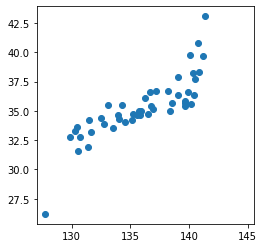

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure()
ax = plt.axes()

plt.scatter(pos[:,0], pos[:,1])
plt.axis("square")
plt.show()

県庁所在地をつないだDelaunay図

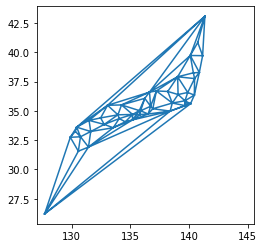

In [3]:
# Delaunay triangulation
from scipy.spatial import Delaunay
tri = Delaunay(pos)
plt.triplot(pos[:,0], pos[:,1], tri.simplices)
plt.axis("square")
plt.show()

2次元のボロノイ図を描くのはライブラリにまかせる。

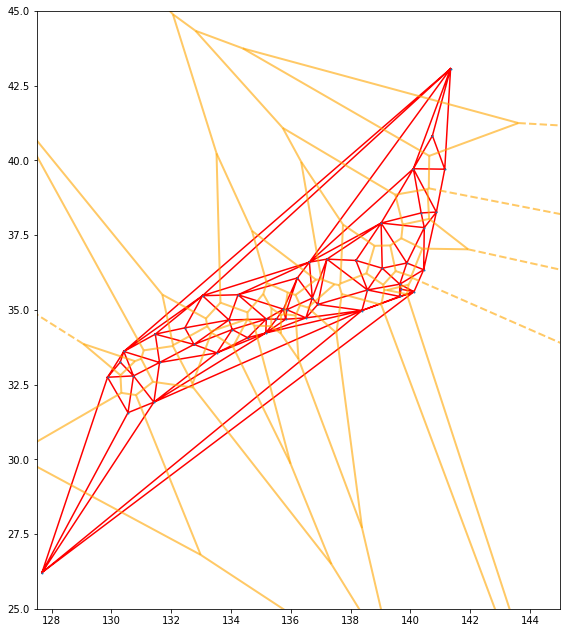

In [4]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.voronoi_plot_2d.html
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(pos)
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',
                line_width=2, line_alpha=0.6, point_size=2)
plt.triplot(pos[:,0], pos[:,1], tri.simplices, c='red')
#plt.xlim(127.5,145)
plt.ylim(25, 45)
plt.axis([127.5, 145, 25, 45])
plt.gca().set_aspect('equal', adjustable='box')
fig.set_size_inches(11,11)
plt.show()

歪んで見えるのは、縦と横の目盛が違うから。

なお、球面(地球)上の点の場合には、非ユークリッドVoronoi分割を適用する必要がある。(二等分線が大円になる)

もうちょっと少ない点で。例えば4点の場合。

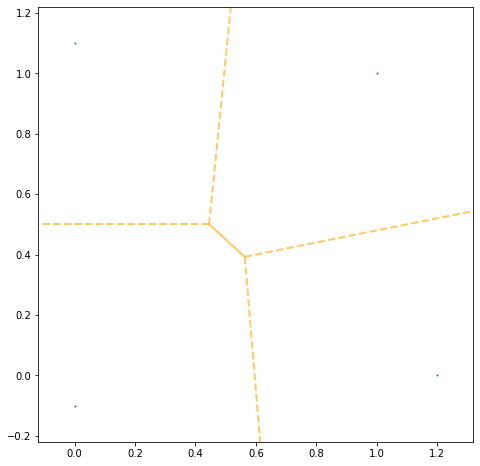

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d
points = np.array([[0, -0.1], [0, 1.1], [1.2, 0], [1, 1]])
vor = Voronoi(points)
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',
                line_width=2, line_alpha=0.6, point_size=2)
plt.gca().set_aspect('equal', adjustable='box')
fig.set_size_inches(8,8)
plt.show()

vorにはどんな情報が含まれているか。

In [ ]:
vor.__dict__

_pointsが与えた点(4つ)、verticeがvoronoi頂点(外接円の中心)のようだ。よく見ると、辺の情報も含まれている。

 3次元でも4次元でもscipy.spatial.Voronoiを使えばVoronoi分割できるが、残念なことに、既存の関数を使って可視化できるのは2次元まで。
 
 別の例。ひまわりの種の配列。

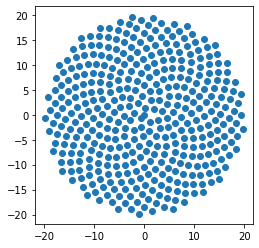

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

tau  = (5**0.5-1)/2 # Golden ratio
A    = 2*np.pi / tau   # Golden angle

# 400点の角度と半径を一気に計算する。
# 半径を等間隔にすると、あとになるほど種の面積が大きくなるので、
# 半径は番号の平方根に比例するようにとる。
angles = np.array([A*i for i in range(400)])
radii  = np.array([i**0.5 for i in range(400)])

x = radii * np.cos(angles)
y = radii * np.sin(angles)

plt.scatter(x,y)
plt.axis('square')
plt.show()

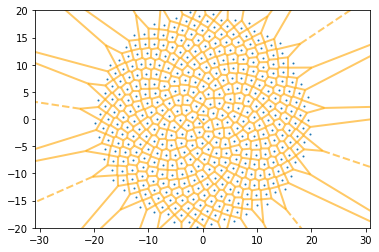

In [ ]:
pos = np.vstack([x,y]).T

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.voronoi_plot_2d.html
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(pos)
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',
                line_width=2, line_alpha=0.6, point_size=2)
plt.axis('equal')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.show()